In [3]:
import numpy as np, os,copy
import hytools as ht
import glob

os.chdir('/Volumes/Extreme_SSD/mangroves/imagery') 

input_files = []
for input in glob.glob('*ort'):
    input_files.append(input)
    
print(input_files)

['prm20140119t182713_rfl_ort', 'prm20140119t182133_rfl_ort', 'prm20140119t184451_rfl_ort', 'prm20140119t185056_rfl_ort', 'prm20140119t190307_rfl_ort', 'prm20140119t185651_rfl_ort', 'prm20140119t183909_rfl_ort', 'prm20140119t183310_rfl_ort', 'prm20140119t191543_rfl_ort', 'prm20140119t190852_rfl_ort']


In [56]:
for i in red:
    hyObj = ht.openENVI(i)
    hyObj.load_data()
    hyObj.create_bad_bands([[299,450],[1050,1110]])
    
    # Create output file
    output_file = i + "_scaled"
    header_dict = copy.copy(hyObj.header_dict)
    header_dict['interleave'] = 'bsq' 
    
    #This line changes the datatype to uint16
# see https://www.harrisgeospatial.com/docs/ENVIHeaderFiles.html
    header_dict['data type'] =12

# Here we pick a number to scale the data by since the data are between 0 and 1
# the max value will be 10,000 which is less than 2^16 = 65536
    scaler = 10000

#Change no data values from -50 to some unrealistic number
    header_dict['data ignore value'] = 2**16-1

#Here we use the bad bands mask to  update the wavelegnths
    header_dict['wavelength'] =hyObj.wavelengths[hyObj.bad_bands]

# We also need to update the number of bands
    header_dict['bands'] = len(hyObj.wavelengths[hyObj.bad_bands])

    writer = ht.file_io.writeENVI(output_file,header_dict)
    
    iterator = hyObj.iterate(by = 'band')

    new_band = 0
    while not iterator.complete:
        band = iterator.read_next()
    #Only process good bands
        if hyObj.bad_bands[iterator.current_band]:
            print(hyObj.wavelengths[iterator.current_band])
        #scale the band
            scaled_band = band*scaler
        #Change negatives to 0
            scaled_band[scaled_band<0] = 0
        #Change no data value
            scaled_band[band==hyObj.no_data ] = header_dict['data ignore value']

            writer.write_band(scaled_band,new_band)
            new_band +=1
        
    writer.close()
    
    

452.28200000000004
455.11400000000003
457.947
460.779
463.611
466.444
469.276
472.109
474.94199999999995
477.774
480.607
483.44
486.273
489.106
491.939
494.772
497.605
500.43800000000005
503.27200000000005
506.105
508.938
511.772
514.605
517.439
520.2719999999999
523.106
525.9390000000001
528.773
531.6070000000001
534.441
537.275
540.1089999999999
542.943
545.7769999999999
548.611
551.4449999999999
554.279
557.114
559.948
562.783
565.6170000000001
568.452
571.286
574.121
576.955
579.7900000000001
582.625
585.46
588.295
591.13
593.9649999999999
596.8
599.635
602.4699999999999
605.306
608.1410000000001
610.976
613.812
616.6469999999999
619.4830000000001
622.318
625.154
627.99
630.8249999999999
633.6610000000001
636.497
639.3330000000001
642.169
645.005
647.841
650.6769999999999
653.514
656.35
659.186
662.023
664.8589999999999
667.6959999999999
670.532
673.369
676.2049999999999
679.042
681.879
684.716
687.553
690.39
693.2270000000001
696.064
698.901
701.7379999999999
704.5749999999999
707

In [ ]:
#####Setup#####

#load modules
#import hytools as ht
#from spectral import *
#import spectral.io.envi as envi
#import numpy as np
#import matplotlib as plt
#%matplotlib inlxine
#import mpld3
#mpld3.enable_notebook()

#Read in imagery data
#first test: clean two flightlines and try to mosaic them
#img1 = envi.open('/Volumes/Extreme_SSD/mangroves/imagery/20140119/prm20140119t182133_rfl_ort.hdr',
#                '/Volumes/Extreme_SSD/mangroves/imagery/20140119/prm20140119t182133_rfl_ort.dat')

#img2 = envi.open('/Volumes/Extreme_SSD/mangroves/imagery/20140119/prm20140119t182713_rfl_ort.hdr',
#                '/Volumes/Extreme_SSD/mangroves/imagery/20140119/prm20140119t182713_rfl_ort')

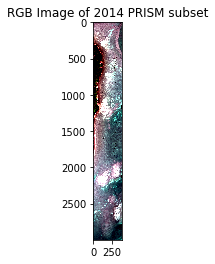

In [140]:
#view = imshow(hyObj.data.clip[:,:,[120,88,62]], stretch=0.08,title="RGB Image of 2014 PRISM subset" )

In [36]:
#first step is to remove noisy bands
#first pass remove everything below 450 and above 1050 nm

#get band positions
#for index, value in enumerate(img1.bands.centers, 0):
#     print("{}. {}".format(index, value))
        
#0-54 need to be removed; 265-284 need to be axed
#img_clean1 = img1[:,:,55:200]
#img_clean2 = img2[:,:,55:264]
